# Unsupervised learning (PCA)</a>



## <a> Motivation </a>
Principal Component Analysis (PCA)! A profoundly valuable tool in real life yet significantly underutilized! Beyond being a mere "mathematical hammer," Principal Component Analysis has numerous practical applications that can be leveraged across virtually any industry or organization.

At this juncture, colleagues in marketing stand far ahead of many other industries. One of the primary applications lies in customer, user, or supplier segmentation. Consider a company aiming to launch a new product, conducting research to better understand customer needs and desires, thereby directing marketing campaigns for the launch.

Questionnaires yielding dozens or even hundreds of responses pose challenges in analyzing and grouping similar segments. PCA steps in to rescue us: by reducing the dimensionality of questionnaire responses, it significantly enhances the comprehension and application of cluster analysis.

This type of problem is evidently applicable across various economic sectors!







## <a> Object of Study </a>
This porject is a about a fictional company "Let's Ride" that are launching a new concept car, a kind of microvan (larger than an SUV but smaller than a minivan), and we want to identify the best target audience to kickstart our marketing campaigns. The primary method to detect such trends is through primary consumer research, typically starting with targeted focus groups and progressing to medium and eventually large-scale surveys. These surveys serve at least two purposes:

to ascertain the "wants and needs" of a specific consumer group/niche
together with demographic data, to attempt to evaluate the profile of those who liked the Let's Ride microvan concept
The business questions we aim to answer are:

What is the target segment for this car?
What are the desires and needs of this segment?
Therefore, Let's Ride conducted various focus group research sessions among potential car buyers. Additionally, the marketing team examined a long list of potential attributes that could be important to microvan buyers, as well as lifestyle statements, validated by their extensive previous research in the automotive industry. Based on detailed notes taken during the focus group phase, they settled on a set of 30 attributes that seemed to capture the nature of the discussion, as well as important demographic variables. The goal is to use these attributes to capture the key dimensions that characterize potential buyers and identify the segments that Let's Ride could target for its campaigns. Finally, a car (microvan) design was presented for potential consumers to rate on a scale of 1 to 9 whether they liked it or not.

The issue is that if we perform a cluster analysis with 30 features, the result will not be very intelligible, making it difficult to understand customer profiles. We can reduce the dimensionality of the features to group those with similar variance (PCA) and then evaluate the result of this reduction in terms of customer interests. To assess the homogeneity of the groups, only clustering is used, but with PCA, we can combine features with similar variance, which, for questionnaire responses, serves as a grouping of response profiles.

As with other projects in banking, telecommunications, retail, or any company that provides services and has information about its customers, can benefit from customer questionnaire analysis and reduction in principal components as we will build in this project.

This real case study (Grosse Pointe Associates and The "Microvan") is available in the excellent book "Modern Marketing Research: Concepts, Methods, and Cases" ISBN 1133188966.

In [168]:
# importing the lybraries
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


# configuring pandas to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

# configuring pandas to not show scientific notation for numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [169]:
#get the data
df_microvan  = pd.read_csv('C:/Users/marci/Downloads/script (2)/data/microvan.csv')
df_microvan.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [170]:
df_microvan.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

In [171]:
df_microvan = df_microvan.set_index('subjnumb')
df_microvan.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


Data dictionary

In addition to the variable **mvliking** that shows how much the potential customer liked the microvan concept, the other columns related to the questionnaire are:

- kidtrans: We need a car that helps transport our children and their friends.
- miniboxy: Current minivans are simply too boxy and big.
- lthrbetr: Leather seats are much better than fabric seats.
- secbiggr: If we had a second car, it would need to be bigger than a standard sedan.
- safeimpt: Car safety is very important to me.
- buyhghnd: We tend to buy more sophisticated cars.
- pricqual: Car prices strongly reflect the underlying production quality.
- prmsound: A premium sound and entertainment system helps on long car journeys.
- perfimpt: Performance is very important in a car.
- tkvacatn: We try to take as much vacation as possible.
- noparkrm: Our current residence doesn't have much parking space.
- homlrgst: Our house is among the largest in the neighborhood.
- envrminr: The environmental impact of cars is relatively small.
- needbetw: There needs to be something between a sedan and a minivan.
- suvcmpct: I like SUVs more than minivans, as they are more compact.
- next2str: My next car will be a two-seater.
- carefmny: We are careful with money.
- shdcarpl: I think everyone should carpool or use public transportation.
- imprtapp: Most of our devices are imported.
- lk4whldr: All-wheel drive is a very attractive option.
- kidsbulk: Our children tend to carry a lot of bulky items and toys with them.
- wntguzlr: I'll buy what I want even if it's a “gas guzzler”.
- nordtrps: We don't go on family trips
- stylclth: We tend to buy stylish clothes for the family.
- strngwrn: Warranty protection needs to be strong on a new car.
- passnimp: Passion for work is more important than pay.
- twoincom: Our family would find it difficult to subsist on just one income.
- nohummer: I am not interested in owning a vehicle like a Hummer.
- aftrschl: We engage in more after-school activities than most families.
- accesfun: Accessories really make the car more fun to drive.

Customer demographic data is:

- age: Age of the interviewee in years
- income: Annual family income in thousands of dollars
- miles: Total annual value driven by family members in thousands of miles
- numkids: Number of children (0-18 years old) living in the household
- female: Whether or not the interviewee is a woman
- educ: Respondent's education level (1 = High school, 2 = Some college, 3 = Undergraduate, 4 = Postgraduate)
- recycle: Self-reported recycling compared to the average (1 = Much less, 2 = A little less, 3 = Average, 4 = A little more, 5 = Much more)

In [172]:
data_dictionary = dict()

data_dictionary['kidtrans'] = 'We need a car that helps transport our kids and their friends'
data_dictionary['miniboxy'] = 'Current minivans are simply too square and large'
data_dictionary['lthrbetr'] = 'Leather seats are much better than fabric ones'
data_dictionary['secbiggr'] = 'If we had a second car, it would need to be larger than a standard sedan'
data_dictionary['safeimpt'] = 'Car safety is very important to me'
data_dictionary['buyhghnd'] = 'We tend to buy more sophisticated cars'
data_dictionary['pricqual'] = 'Car prices strongly reflect underlying production quality'
data_dictionary['prmsound'] = 'A premium sound and entertainment system helps on long car trips'
data_dictionary['perfimpt'] = 'Performance is very important in a car'
data_dictionary['tkvacatn'] = 'We try to take as many vacations as possible'
data_dictionary['noparkrm'] = 'Our current residence doesnt have much parking space'
data_dictionary['homlrgst'] = 'Our home is among the largest in the neighborhood'
data_dictionary['envrminr'] = 'The environmental impact of cars is relatively small'
data_dictionary['needbetw'] = 'There needs to be something between a sedan and a minivan'
data_dictionary['suvcmpct'] = 'I prefer SUVs over minivans, as they are more compact'
data_dictionary['next2str'] = 'My next car will be a two-seater'
data_dictionary['carefmny'] = 'We are careful with money'
data_dictionary['shdcarpl'] = 'I think everyone should carpool or use public transportation'
data_dictionary['imprtapp'] = 'Most of our appliances are imported'
data_dictionary['lk4whldr'] = 'Four-wheel drive is a very appealing option'
data_dictionary['kidsbulk'] = 'Our kids tend to bring a lot of bulky items and toys with them'
data_dictionary['wntguzlr'] = 'I will buy what I want even if it is a "gas guzzler"'
data_dictionary['nordtrps'] = "We don't take family trips"
data_dictionary['stylclth'] = 'We tend to buy stylish clothes for the family'
data_dictionary['strngwrn'] = 'Warranty protection needs to be strong on a new car'
data_dictionary['passnimp'] = 'Passion for work is more important than pay'
data_dictionary['twoincom'] = 'Our family would find it difficult to subsist on just one income'
data_dictionary['nohummer'] = "I'm not interested in owning a vehicle like a Hummer"
data_dictionary['aftrschl'] = 'We engage in more after-school activities than most families'
data_dictionary['accesfun'] = 'Accessories really make the car more fun to drive'
data_dictionary['age'] = 'Interviewee age in years'
data_dictionary['income'] = 'Annual family income in thousands of dollars'
data_dictionary['miles'] = 'Total annual miles driven by family members in thousands of miles'
data_dictionary['numkids'] = 'Number of children (0-18 years old) residing in the household'
data_dictionary['female'] = 'Whether the interviewee is female or not'
data_dictionary['educ'] = 'Interviewee education level (1 = High School, 2 = Some College, 3 = Bachelor’s Degree, 4 = Postgraduate)'
data_dictionary['recycle'] = 'Self-reported recycling compared to the average (1 = Much less, 2 = A little less, 3 = Average, 4 = A little more, 5 = Much more)'


In [173]:
df_microvan.shape

(400, 38)

In [174]:
df_microvan.dtypes

mvliking    int64
kidtrans    int64
miniboxy    int64
lthrbetr    int64
secbiggr    int64
safeimpt    int64
buyhghnd    int64
pricqual    int64
prmsound    int64
perfimpt    int64
tkvacatn    int64
noparkrm    int64
homlrgst    int64
envrminr    int64
needbetw    int64
suvcmpct    int64
next2str    int64
carefmny    int64
shdcarpl    int64
imprtapp    int64
lk4whldr    int64
kidsbulk    int64
wntguzlr    int64
nordtrps    int64
stylclth    int64
strngwrn    int64
passnimp    int64
twoincom    int64
nohummer    int64
aftrschl    int64
accesfun    int64
age         int64
income      int64
miles       int64
numkids     int64
female      int64
educ        int64
recycle     int64
dtype: object

In [175]:
df_microvan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wn

## <a>Descriptive statistics </a>

Knowing the statistical measures, central tendency, dispersion, separatrices, distributions, is essential to better understand the data we are working on.

In [176]:
df_microvan.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


## <a> Dimensionality reduction with PCA </a>

In [177]:
colunas_demograficas = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']
df_microvan.drop(colunas_demograficas, axis=1).head()

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4
2,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5
3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6
4,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3
5,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5


In [178]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# Remove the demographic columns to leave only the questionnaire (also remove the mvliking variable)
#So we keeping only the variables of the questionary
demographic_columns = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']

for number_components in range(1, 10):
    pca = PCA(n_components=number_components, random_state=42).fit(df_microvan.drop(demographic_columns , axis=1))
    print(f'{number_components} components with a total variance of {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}')
  


1 components with a total variance of 0.27696709879672465: [0.2769671]
2 components with a total variance of 0.4445767750017479: [0.2769671  0.16760968]
3 components with a total variance of 0.5459459552274878: [0.2769671  0.16760968 0.10136918]
4 components with a total variance of 0.634246449089425: [0.2769671  0.16760968 0.10136918 0.08830049]
5 components with a total variance of 0.69492092802917: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 components with a total variance of 0.7163695796236547: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 components with a total variance of 0.7356422840632021: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 components with a total variance of 0.7538737884378812: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 components with a total variance of 0.7715039823284864: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865


In [179]:
#Chose the number of components as 5 due to the explainability of the variance

In [180]:
pca = PCA(n_components = 5, random_state=42).fit(df_microvan.drop(demographic_columns, axis=1))
f'With 5 components we have {sum(pca.explained_variance_ratio_) * 100} of the variancy explained'

'With 5 components we have 69.492092802917 of the variancy explained'

## <a>Component Analysis</a>

Each component is created as "part" of the original variables. In other words, the original variables make up the main components (remember the projection: the component is the projection of these variables). But to know the impact of each variable on the fine projection, we use an attribute in the PCA object that shows us these values.

In [181]:
pca.components_

array([[-1.54242523e-01, -2.81775831e-02, -2.77771856e-01,
         1.31120032e-02, -6.55592685e-02, -2.48789125e-01,
        -1.87212012e-01, -2.57534039e-01,  2.75945850e-02,
        -2.88168029e-01, -3.63932100e-02, -1.62540808e-01,
         1.67796640e-01, -4.41662433e-02, -5.51359745e-02,
        -6.95906332e-02,  2.91928208e-01, -1.70653306e-01,
        -2.48765321e-01, -1.12947539e-01, -1.64018658e-01,
         2.12266322e-01,  1.33568970e-01, -2.56185238e-01,
        -1.38779086e-01,  2.71164567e-01, -1.99131255e-01,
        -1.99116260e-02, -1.48933645e-01, -2.85564500e-01],
       [ 1.09807865e-03, -3.64988114e-01,  8.12541567e-02,
        -3.38909225e-01, -2.18792400e-04, -8.27943891e-02,
         7.97252373e-02,  6.19192696e-03,  1.47139293e-02,
         1.17792436e-02, -3.61515356e-01,  2.99948345e-01,
         1.51018703e-02, -3.46323846e-01, -3.61913246e-01,
         3.38353633e-01,  6.73537198e-02,  1.41603682e-02,
         7.29399128e-03,  7.47233603e-03, -5.49026164e-

Tthis big ammount of numbers is, in fact, the composition of each component in relation to the original variables. 
We will also show the weights of each feature in the composition of the components graphically.

In [182]:
df_component_composition = pd.DataFrame(columns=df_microvan.drop(colunas_demograficas, axis=1).columns)

for i in range(5):
    df_component_composition.loc[i] = pca.components_[i]

df_component_composition


,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,0.00,-0.36,0.08,-0.34,-0.00,-0.08,0.08,0.01,0.01,0.01,-0.36,0.30,0.02,-0.35,-0.36,0.34,0.07,0.01,0.01,0.01,-0.01,-0.01,0.04,-0.11,0.13,0.01,-0.06,-0.32,0.05,0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,0.31,-0.07,0.03,0.04,-0.44,-0.06,-0.02,-0.01,0.42,0.04,-0.00,-0.00,0.11,-0.05,0.05,0.07,0.01,-0.13,-0.02,-0.42,0.25,0.05,-0.26,0.03,-0.34,-0.11,-0.08,-0.02,0.18,0.07
4,-0.13,0.03,0.08,-0.07,-0.03,0.30,0.42,0.08,0.08,-0.05,0.11,-0.07,0.41,0.02,-0.04,0.17,-0.09,-0.42,-0.07,-0.03,-0.12,0.29,0.16,-0.04,0.03,-0.03,0.39,0.03,-0.02,0.01


In [183]:
data_dictionary['kidtrans']

'We need a car that helps transport our kids and their friends'

In [184]:
# For component 1, let's take the largest positive influence and largest negative influence

df_component_composition.loc[0].max()
#highest value

0.29192820787561413

In [185]:
df_component_composition.columns[df_component_composition.loc[0].argmax()]


'carefmny'

In [186]:
data_dictionary['carefmny']

'We are careful with money'

In [187]:
#CALCULATING FOR EACH COMPONENT
for i in range(5):
    biggest_column = df_component_composition.columns[df_component_composition.loc[i].argmax()]
    smallest_column = df_component_composition.columns[df_component_composition.loc[i].argmin()]

    
    print(f'Component {i+1} Positive Impact: "{data_dictionary[biggest_column]}" and negative impact: "{data_dictionary[smallest_column]}"\n\n')

Component 1 Positive Impact: "We are careful with money" and negative impact: "We try to take as many vacations as possible"


Component 2 Positive Impact: "My next car will be a two-seater" and negative impact: "Current minivans are simply too square and large"


Component 3 Positive Impact: "We engage in more after-school activities than most families" and negative impact: "We don't take family trips"


Component 4 Positive Impact: "Performance is very important in a car" and negative impact: "Car safety is very important to me"


Component 5 Positive Impact: "Car prices strongly reflect underlying production quality" and negative impact: "I think everyone should carpool or use public transportation"





#### <a>Graphically analyzing the weights of each variable in the main components</a>

<Axes: >

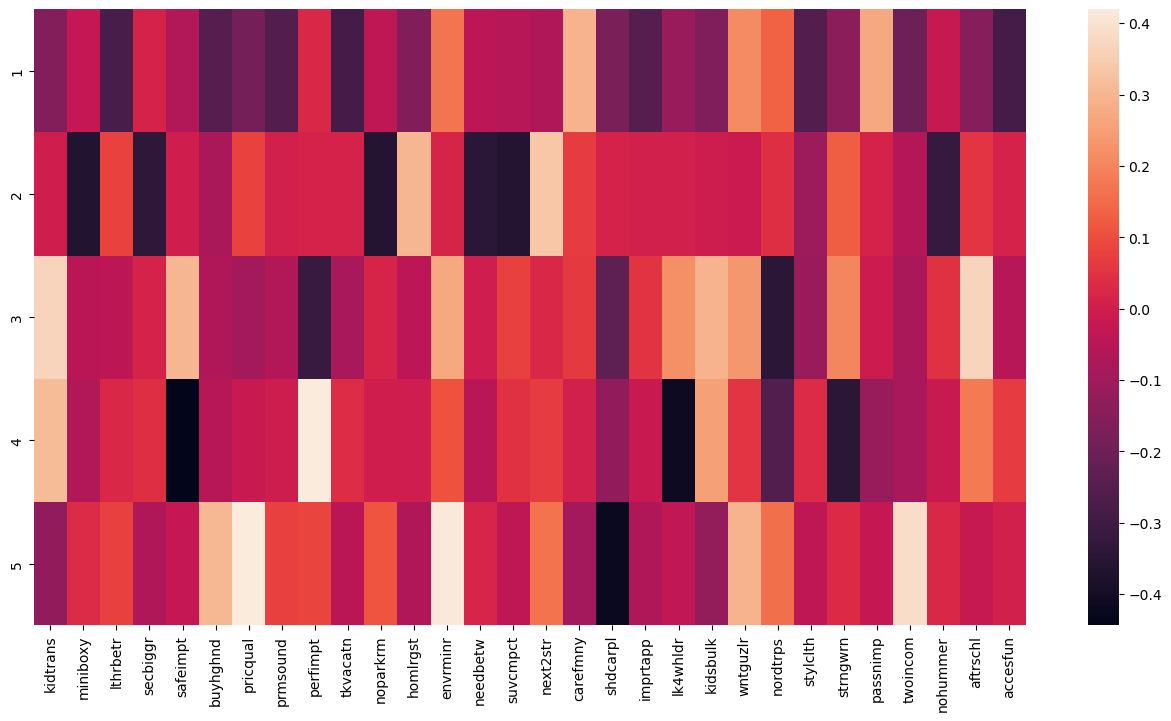

In [188]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.heatmap(data = df_component_composition, yticklabels = df_component_composition.index+1)

- Component 1: **No Vacations**
- Component 2: **Likes tight cars**
- Component 3: **Cares about family**
- Component 4: **People that like fast cars**
- Component 5: **The cars have to be good and don't care about polution**


Now, after understanded the components, is important that we transform the original Dataframe with the components created

In [189]:
principal_components_microvan = pca.transform(df_microvan.drop(demographic_columns, axis =1))
principal_components_microvan

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315]])

## <a>Starting with KMeans</a>
With the reduction of dimensionaluty, now the can start with the clusterization


In [190]:
components_names = ['murrinhas', 'apertados', 'familia', 'velozes', 'carro_caro']

df_principal_components_microvan = pd.DataFrame(principal_components_microvan, columns = components_names, index=df_microvan.index)
df_principal_components_microvan.head()

,murrinhas,apertados,familia,velozes,carro_caro
subjnumb,,,,,
1,4.96,-0.63,0.25,4.53,0.48
2,-0.43,-4.58,-2.68,-2.62,-0.50
3,-4.20,6.00,2.46,1.55,-2.41
4,4.89,-0.93,-0.76,-3.58,3.52
5,0.12,5.55,-1.02,0.07,-0.84


In [191]:
demographic_columns

df_complete = pd.concat([df_microvan.loc[:, demographic_columns], df_principal_components_microvan], axis=1)
df_complete.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,murrinhas,apertados,familia,velozes,carro_caro
subjnumb,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,-0.63,0.25,4.53,0.48
2,36,79,16,1,0,3,4,6,-0.43,-4.58,-2.68,-2.62,-0.50
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41
4,32,42,12,0,0,3,2,3,4.89,-0.93,-0.76,-3.58,3.52
5,40,75,17,1,1,3,4,1,0.12,5.55,-1.02,0.07,-0.84


C:\Users\marci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\marci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\marci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\marci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

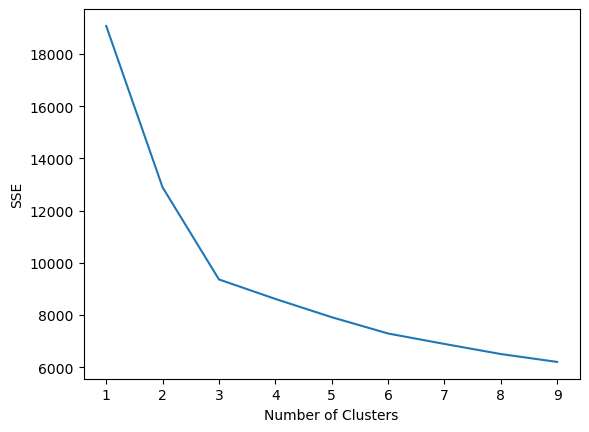

In [192]:
#Creating the clusters
from sklearn.cluster import KMeans

#Using the SSE Metric

sse = {}

# Vamos utilizar o gráfico de cotovelo utilizando a métrica SSE variando de 1 a 9 clusters
for num_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, ).fit(df_complete.loc[:, components_names])
    
    #Including information to which cluster each observation belongs
    #df_complete["clusters"] = kmeans.labels_

    # Inertia: Sum of distances between observations and the center of your cluster
    sse[num_clusters] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()





In [193]:
kmeans = KMeans(n_clusters=3, max_iter=1000,).fit(df_complete.loc[:, components_names])

# Including information to which cluster each observation belongs
df_complete["clusters"] = kmeans.labels_
df_complete.head()

C:\Users\marci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



,age,income,miles,numkids,female,educ,recycle,mvliking,murrinhas,apertados,familia,velozes,carro_caro,clusters
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,-0.63,0.25,4.53,0.48,1
2,36,79,16,1,0,3,4,6,-0.43,-4.58,-2.68,-2.62,-0.50,0
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41,2
4,32,42,12,0,0,3,2,3,4.89,-0.93,-0.76,-3.58,3.52,1
5,40,75,17,1,1,3,4,1,0.12,5.55,-1.02,0.07,-0.84,2


In [194]:
#Centroid location
kmeans.cluster_centers_

array([[-3.48849845e+00, -3.91200832e+00,  1.35259023e-03,
        -2.54746462e-02, -1.04893614e-01],
       [ 4.82314353e+00, -1.73590358e-01,  2.61090894e-01,
        -8.41311457e-02, -3.96639111e-02],
       [-2.90701573e+00,  3.72889618e+00, -3.28091713e-01,
         1.28196550e-01,  1.43814440e-01]])

In [195]:
df_centroids = pd.DataFrame(data=kmeans.cluster_centers_, columns=components_names)
df_centroids

,murrinhas,apertados,familia,velozes,carro_caro
0,-3.49,-3.91,0.00,-0.03,-0.10
1,4.82,-0.17,0.26,-0.08,-0.04
2,-2.91,3.73,-0.33,0.13,0.14


In [196]:
df_cluster0 = df_complete.loc[df_complete['clusters'] == 0]
df_cluster0.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,murrinhas,apertados,familia,velozes,carro_caro,clusters
subjnumb,,,,,,,,,,,,,,
2,36,79,16,1,0,3,4,6,-0.43,-4.58,-2.68,-2.62,-0.50,0
7,47,38,26,2,1,4,3,8,-3.95,-4.49,2.79,-0.14,-0.11,0
15,52,119,28,3,1,3,3,6,-6.21,-5.45,1.31,-0.02,-0.12,0
16,39,28,29,2,1,4,3,6,-3.66,-4.64,4.12,-2.77,-2.56,0
17,43,113,17,0,0,4,4,9,-4.10,-4.96,-5.54,-2.71,2.03,0


In [197]:
df_cluster1 = df_complete.loc[df_complete['clusters'] == 1]
df_cluster1.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,murrinhas,apertados,familia,velozes,carro_caro,clusters
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,-0.63,0.25,4.53,0.48,1
4,32,42,12,0,0,3,2,3,4.89,-0.93,-0.76,-3.58,3.52,1
8,29,39,16,1,0,2,2,4,4.29,-1.27,2.10,-2.66,0.53,1
10,26,26,11,0,0,2,3,3,8.11,1.87,-1.86,-1.12,-0.59,1
11,31,20,12,0,1,3,3,1,5.16,-2.38,2.59,-3.28,0.27,1


In [198]:
df_cluster2 = df_complete.loc[df_complete['clusters'] == 2]
df_cluster2.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,murrinhas,apertados,familia,velozes,carro_caro,clusters
subjnumb,,,,,,,,,,,,,,
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41,2
5,40,75,17,1,1,3,4,1,0.12,5.55,-1.02,0.07,-0.84,2
6,43,94,16,0,0,3,5,2,-3.41,8.46,-3.38,-1.64,-1.34,2
9,38,129,20,1,0,3,2,5,-3.82,4.41,-0.15,1.17,1.07,2
12,43,136,17,0,0,3,1,3,-2.17,4.27,0.15,1.24,2.22,2


In [199]:
df_complete['clusters'].value_counts()

1    159
2    127
0    114
Name: clusters, dtype: int64

In [200]:
df_cluster0.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,murrinhas,apertados,familia,velozes,carro_caro,clusters
count,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00
mean,44.34,83.61,22.37,1.98,0.60,3.35,3.09,6.65,-3.49,-3.91,0.00,-0.03,-0.10,0.00
std,5.68,33.32,4.04,1.11,0.49,0.65,1.23,2.23,1.97,1.56,2.77,2.54,1.90,0.00
min,31.00,28.00,14.00,0.00,0.00,2.00,1.00,1.00,-9.12,-7.18,-6.66,-7.18,-4.86,0.00
25%,40.25,59.25,19.25,1.00,0.00,3.00,2.00,5.00,-4.80,-5.18,-1.79,-1.64,-1.48,0.00
50%,44.00,79.00,22.00,2.00,1.00,3.00,3.00,7.00,-3.33,-3.93,-0.13,-0.01,-0.15,0.00
75%,48.00,107.25,25.75,3.00,1.00,4.00,4.00,9.00,-2.08,-2.84,2.08,1.38,0.99,0.00
max,58.00,168.00,32.00,4.00,1.00,4.00,5.00,9.00,0.72,-0.04,7.07,6.62,5.26,0.00


In [201]:
df_cluster1.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,murrinhas,apertados,familia,velozes,carro_caro,clusters
count,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00
mean,32.15,36.65,14.61,0.67,0.48,2.05,2.99,3.91,4.82,-0.17,0.26,-0.08,-0.04,1.00
std,5.30,16.33,3.56,0.76,0.50,0.77,1.13,2.48,1.90,1.77,2.54,2.47,2.17,0.00
min,19.00,15.00,7.00,0.00,0.00,1.00,1.00,1.00,1.20,-5.24,-5.78,-5.29,-5.83,1.00
25%,28.00,25.00,12.00,0.00,0.00,1.00,2.00,2.00,3.52,-1.24,-1.47,-1.79,-1.50,1.00
50%,32.00,32.00,15.00,1.00,0.00,2.00,3.00,4.00,4.60,-0.32,0.27,-0.22,-0.07,1.00
75%,36.00,45.00,17.00,1.00,1.00,3.00,4.00,6.00,5.97,1.06,2.05,1.45,1.51,1.00
max,48.00,131.00,24.00,4.00,1.00,3.00,5.00,9.00,10.33,4.33,6.87,5.90,5.45,1.00


In [202]:
df_cluster2.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,murrinhas,apertados,familia,velozes,carro_caro,clusters
count,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00
mean,46.10,103.57,18.46,1.22,0.56,3.26,3.06,4.39,-2.91,3.73,-0.33,0.13,0.14,2.00
std,6.00,43.61,3.53,0.99,0.50,0.66,1.19,2.54,1.85,1.58,2.64,2.41,2.02,0.00
min,31.00,41.00,10.00,0.00,0.00,1.00,1.00,1.00,-7.44,-0.22,-6.20,-6.34,-4.31,2.00
25%,42.00,73.00,16.00,0.50,0.00,3.00,2.00,2.00,-4.12,2.77,-2.31,-1.62,-1.28,2.00
50%,46.00,95.00,18.00,1.00,1.00,3.00,3.00,4.00,-2.67,3.68,-0.11,0.30,-0.03,2.00
75%,51.00,127.00,21.00,2.00,1.00,4.00,4.00,6.00,-1.79,4.74,1.47,1.55,1.28,2.00
max,60.00,273.00,27.00,4.00,1.00,4.00,5.00,9.00,1.28,8.46,5.46,7.34,6.33,2.00


### Understanding the clusters

In [203]:
import plotly.express as px

fig = px.histogram(data_frame=df_cluster0, x='mvliking')
fig.show()

In [204]:
fig = px.histogram(data_frame=df_cluster1, x='mvliking', color_discrete_sequence=['indianred'])
fig.show()

In [205]:
fig = px.histogram(data_frame=df_cluster1, x='mvliking', color_discrete_sequence=['slategray'])
fig.show()

In [206]:
fig = px.box(data_frame=df_complete, x='clusters', y='mvliking', color='clusters')
fig.show()

In [207]:
#Demographic Analysis
df_complete.columns

Index(['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle',
       'mvliking', 'murrinhas', 'apertados', 'familia', 'velozes',
       'carro_caro', 'clusters'],
      dtype='object')

In [208]:
df_demographic = df_complete.iloc[:, :8]
df_demographic.head()

,age,income,miles,numkids,female,educ,recycle,mvliking
subjnumb,,,,,,,,
1,34,59,14,1,0,1,3,4
2,36,79,16,1,0,3,4,6
3,51,72,22,2,1,3,3,3
4,32,42,12,0,0,3,2,3
5,40,75,17,1,1,3,4,1


<Axes: >

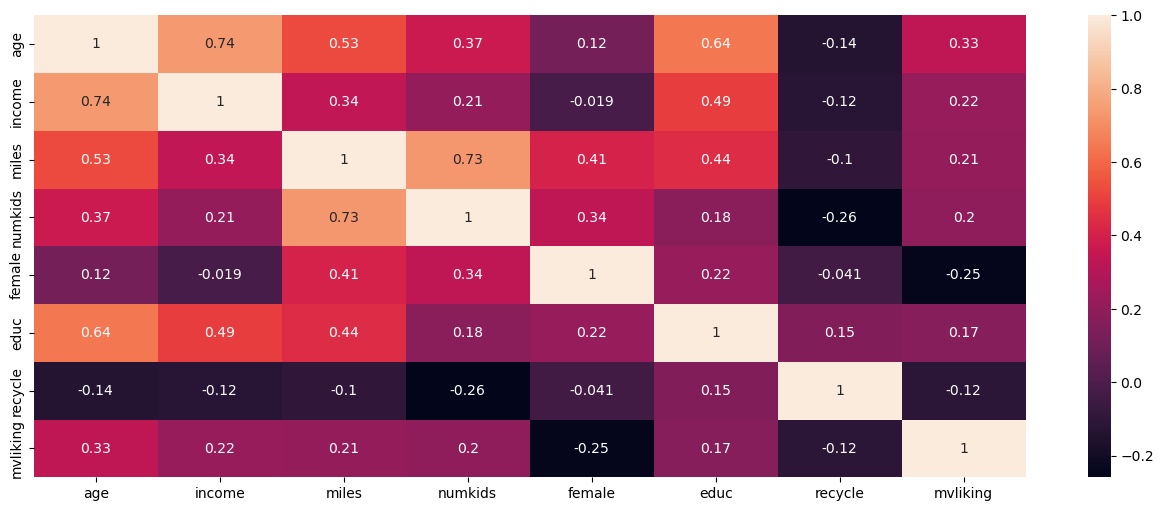

In [209]:
demographic_corelations = df_demographic.corr()

plt.figure(figsize=(16, 6))
sns.heatmap(data= demographic_corelations, annot = True)

<Axes: xlabel='age'>

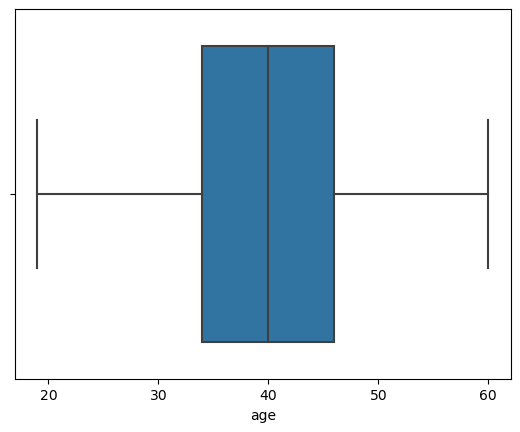

In [210]:
sns.boxplot(data = df_demographic, x='age')

In [211]:
df1 = df_complete.loc[(df_complete['age'] >=40) & (df_complete['female'] == False), :]

fig = px.box(data_frame=df1, 
             x='clusters', 
             y='mvliking', color='clusters')
fig.show()

In [212]:
100 * len(df_complete.loc[(df_complete['age'] >=40) & (df_complete['female'] == False)& (df_complete['clusters'] == 1), :]) / len(df_complete)

2.0

In [213]:
len(df_complete.loc[(df_complete['age'] >=40) & (df_complete['female'] == False)& (df_complete['clusters'] == 1), :])

8

In [214]:
df_centroids

,murrinhas,apertados,familia,velozes,carro_caro
0,-3.49,-3.91,0.00,-0.03,-0.10
1,4.82,-0.17,0.26,-0.08,-0.04
2,-2.91,3.73,-0.33,0.13,0.14


# <a>Conclusion</a>

It's evident that we've gained significant insights into the business. We have successfully segmented customers into clusters, utilizing PCA to simplify the questionnaire process. Moreover, we have identified a cluster that exhibits a higher propensity to purchase our microvan.

It's clear that we can simply rely on individual ratings to gauge prototype satisfaction, but now we possess a robust method for customer segmentation. The characteristics of Cluster 1, combined with the strongest components of this cluster, provide a much clearer understanding of the customer profiles that should be the focal point of our marketing campaign. These insights, when coupled with demographic data, indicate that our focus should be primarily on males above the age of 40/45, who are inclined towards significant automobile expenditures (negative penny-pinching) and prioritize spaciousness (negative cramped conditions). In essence, are we targeting the affluent middle-aged man?





